- 基础配置
- 张量处理
- 张量计算
- torch.nn
- torch.utils
- torchnlp
- Pipeline

In [1]:
import torch

In [3]:
# torch.bincount: 计算非负数组中每个值的频率，值对应返回数组的索引，频率对应返回数组的值
input = torch.randint(0, 8, (5,), dtype=torch.int64)
print(input)
print(torch.bincount(input))

tensor([3, 5, 0, 0, 4])
tensor([2, 0, 0, 1, 1, 1])


In [ ]:
# tensor.nelement(): 可以统计 tensor 的元素个数

In [ ]:
# torch.set_num_threads(n_threads)
	# 参数的意义: Number of threads used for parallelizing CPU operations

In [ ]:
# 用 del 及时删除不用的中间变量，节约 GPU 存储
# 使用 inplace 操作可节约 GPU 存储
	# x = torch.nn.functional.relu(x, inplace=True)
# 减少 CPU 和 GPU 之间的数据传输
	# 例如如果你想知道一个 epoch 中每个 mini-batch 的 loss 和准确率
	# 先将它们累积在 GPU 中等一个 epoch 结束之后一起传输回 CPU 会比每个 mini-batch 都进行一次 GPU 到 CPU 的传输更快
# 使用半精度浮点数 half() 会有一定的速度提升，具体效率依赖于 GPU 型号。需要小心数值精度过低带来的稳定性问题

In [ ]:
# model(x) 前用 model.train() 和 model.eval() 切换网络状态
# 不需要计算梯度的代码块用 with torch.no_grad() 包含起来
# model.eval() 和 torch.no_grad() 的区别在于
# model.eval() 是将网络切换为测试状态，例如 BN 和dropout在训练和测试阶段使用不同的计算方法
# torch.no_grad() 是关闭 PyTorch 张量的自动求导机制，以减少存储使用和加速计算，得到的结果无法进行 loss.backward()
# model.zero_grad()会把整个模型的参数的梯度都归零, 而optimizer.zero_grad()只会把传入其中的参数的梯度归零
# loss.backward() 前用 optimizer.zero_grad() 清除累积梯度

import torch.optim as optim
# scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=self.lr_milestones, gamma=0.1)
scheduler.step()
float(scheduler.get_lr()[0])

# /home/yaoqf/miniconda3/envs/cvdd/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
#   "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)

# /home/yaoqf/miniconda3/envs/cvdd/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:417: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
#   "please use `get_last_lr()`.", UserWarning)

# torch.optim.lr_scheduler.StepLR(optimizer, optimizer_params["lr_decay_step"], gamma=optimizer_params["lr_decay_factor"])

In [ ]:
# torch.nn.CrossEntropyLoss 的输入不需要经过 Softmax
# torch.nn.CrossEntropyLoss 等价于 torch.nn.functional.log_softmax + torch.nn.NLLLoss

# F.cross_entropy(input, target, reduction='none', weight=weight) # weight确定每个类别的权重
	# 该函数使用了 log_softmax 和 nll_loss
# F.nll_entropy()

In [ ]:
cosine_sim = nn.CosineSimilarity(dim=2)
cosine_sim(M, c)

In [ ]:
# 命名张量
import torch
# 在PyTorch 1.3之前，需要使用注释
# Tensor[N, C, H, W]
images = torch.randn(32, 3, 56, 56)
images.sum(dim=1)
images.select(dim=1, index=0)

# PyTorch 1.3之后
NCHW = ['N', 'C', 'H', 'W']
images = torch.randn(32, 3, 56, 56, names=NCHW)
images.sum('C')
images.select('C', index=0)
# 也可以这么设置
tensor = torch.rand(3,4,1,2,names=('C', 'N', 'H', 'W'))
# 使用align_to可以对维度方便地排序
tensor = tensor.align_to('N', 'C', 'H', 'W')

In [ ]:
# 从只包含一个元素的张量中提取值
value = torch.rand(1).item()

In [ ]:
# 在将卷积层输入全连接层的情况下通常需要对张量做形变处理，
# 相比torch.view，torch.reshape可以自动处理输入张量不连续的情况。
tensor = torch.rand(2,3,4)
shape = (6, 4)
tensor = torch.reshape(tensor, shape)

In [ ]:
# 判断两个张量相等
# torch.allclose(tensor1, tensor2)  # float tensor
# torch.equal(tensor1, tensor2)     # int tensor

In [ ]:
# 计算模型整体参数量
# num_parameters = sum(torch.numel(parameter) for parameter in model.parameters())
# sum(p.numel() for p in model.parameters() if p.requires_grad)


# sum([p.data.nelement() for p in model.parameters()])

# 可训练参数
# net_parameters = filter(lambda p: p.requires_grad, parameters())
# params = sum([np.prod(p.size()) for p in net_parameters])

# for x in filter(lambda p: p.requires_grad, net.parameters()):
# total_params += np.prod(x.data.numpy().shape)

# print("Total layers", len(list(filter(lambda p: p.requires_grad and len(p.data.size()) > 1, net.parameters()))))

In [ ]:
# 可以通过model.state_dict()或者model.named_parameters()函数查看现在的全部可训练参数（包括通过继承得到的父类中的参数）
# params = list(model.named_parameters())
# (name, param) = params[28]
# print(name)
# print(param.grad)
# print('-------------------------------------------------')
# (name2, param2) = params[29]
# print(name2)
# print(param2.grad)
# print('----------------------------------------------------')
# (name1, param1) = params[30]
# print(name1)
# print(param1.grad)

In [ ]:
# 模型可视化（使用pytorchviz）
# szagoruyko/pytorchvizgithub.com
# PyTorch可以使用tensorboard来可视化训练过程
	# 运行tensorboard: tensorboard --logdir=runs
	# 使用SummaryWriter类来收集和可视化相应的数据，放了方便查看，可以使用不同的文件夹，比如'Loss/train'和'Loss/test'。
	# from torch.utils.tensorboard import SummaryWriter
	# import numpy as np
	# writer = SummaryWriter()
	# for n_iter in range(100):
		# writer.add_scalar('Loss/train', np.random.random(), n_iter)
		# writer.add_scalar('Loss/test', np.random.random(), n_iter)
		# writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
		# writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

# 类似 Keras 的 model.summary() 输出模型信息，使用pytorch-summary
# sksq96/pytorch-summarygithub.com

## 基础配置

In [ ]:
# torch.manual_seed(args.seed)
# torch.cuda.manual_seed(args.seed)
# torch.backends.cudnn.deterministic = True

### 检查 PyTorch 版本

In [1]:
# torch版本
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.__version__

'1.7.0+cu101'

In [3]:
# cuda版本
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))

torch.cuda.set_device(args.gpu)
model = model.cuda()
.cuda(args.gpu)
# 或
device = torch.device("cuda")
model = model.to(device)

10.0.130
7602
GeForce RTX 2080 Ti


In [ ]:
# torch.set_num_threads(n_threads)

In [ ]:
# random.seed(0)
# np.random.seed(0)
# torch.manual_seed(0)

# torch.cuda.manual_seed_all(0)
# torch.backends.cudnn.deterministic = True # 打开CUDNN deterministic设置, 会降低训练速度; 且从checkpoints重新开始时会出现意外的结果
# torch.backends.cudnn.benchmark = False # 设置为 True，就可以大大提升卷积神经网络的运行速度.可在网络训练开始前设置

In [ ]:
# torch.cuda.empty_cache()
# 清除显存

## 张量处理

### 张量基本信息

In [60]:
# 张量的创建
# torch.Tensor(size)
# .random_() | .resize_() | .zero_() | .mul_()
# .new_zeros(shape)
# .bernoulli_(prob)
# .max()
# .view()
# .scatter_()
# .sort(dim, descending=True) # 输出value,index
example = torch.Tensor(2, 3, 4)
print(example)
print(example.random_(10)) # 0-9
r = torch.Tensor(example)
r.resize_(2, 4, 3)
print(r)
print(r.zero_())
print(example) # 值全变为0，size不变

tensor([[[-7.1653e+26,  4.5752e-41, -7.1653e+26,  4.5752e-41],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])
tensor([[[7., 1., 7., 6.],
         [3., 4., 7., 7.],
         [5., 0., 8., 3.]],

        [[0., 2., 9., 5.],
         [8., 2., 5., 1.],
         [2., 4., 5., 2.]]])
tensor([[[7., 1., 7.],
         [6., 3., 4.],
         [7., 7., 5.],
         [0., 8., 3.]],

        [[0., 2., 9.],
         [5., 8., 2.],
         [5., 1., 2.],
         [4., 5., 2.]]])
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 

In [5]:
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)
n.mul_(2)
print(n_np)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])
[0 2 4 6 8]


In [3]:
# torch.Tensor创建一维张量
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [8]:
print(f'dim: {v.dim()}, size: {v.size()}, {v.size()[0]}')

dim: 1, size: torch.Size([4]), 4


In [11]:
# torch.Tensor创建二维张量
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [12]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [15]:
# 矩阵转置: .t() | .transpose(0, 1)
print(m.t())
print(m.transpose(0, 1))

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])
tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])


In [16]:
# 从矩阵中获取值
print(m[0][2])
print(m[0, 2])
print(m[:, 1])
print(m[:, [1]])
print(m[[0], :])
print(m[0, :])

tensor(3.)
tensor(3.)
tensor([5., 2.])
tensor([[5.],
        [2.]])
tensor([[2., 5., 3., 7.]])
tensor([2., 5., 3., 7.])


In [5]:
# torch.randn(size)
a = torch.randn(1, 3)
print(a)
print(a.shape)

tensor([[ 0.6320, -0.0545,  0.9207]])
torch.Size([1, 3])


In [8]:
# torch.rand(size)
print(torch.rand(2,2))
input = torch.tensor([1,2,3,4]).float() 
print(torch.rand_like(input)) # 等价于torch.rand(input_size))
print(torch.rand(4))

tensor([[0.6492, 0.2801],
        [0.0519, 0.4007]])
tensor([0.8783, 0.1789, 0.0026, 0.4946])
tensor([0.9872, 0.0376, 0.4982, 0.6448])


In [2]:
# torch.zeros_like | torch.zeros
device = torch.device("cuda")
logprob = torch.tensor([1,2,3,4]).float().to(device)
torch.zeros_like(logprob).device, torch.zeros(logprob.size()).device

# torch.zeros_like(x, dtype=torch.uint8)

# image = torch.zeros_like(inputs)
# image.copy_(inputs)

(device(type='cuda', index=0), device(type='cpu'))

In [2]:
torch.empty(0)

tensor([])

In [6]:
# torch.tensor(example)
a=torch.tensor([1,2,3,4])
print(a)

tensor([1, 2, 3, 4])


In [4]:
# torch.zeros | torch.ones
print(torch.zeros(3, 5))
print(torch.ones(3, 2, 5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [7]:
# .new_zeros() | torch.eye(n) | tensor.new(shape)
a=torch.tensor([1,2,3,4])
print(a.new_zeros(a.size(0)))
print(a)

e = torch.eye(3)
print(e)
print(e.type())

tensor([0, 0, 0, 0])
tensor([1, 2, 3, 4])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
torch.FloatTensor


In [2]:
# torch.arange()
print(torch.arange(3., 8 + 1))
print(torch.arange(5.7, -2.1, -3))

tensor([3., 4., 5., 6., 7., 8.])
tensor([ 5.7000,  2.7000, -0.3000])


In [3]:
# torch.linspace
print(torch.linspace(3, 8, 20).view(1, -1)) # 包含首尾值

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])


In [14]:
# 张量的统计数据
# .type()/type() | .size()/.shape | .dim() | .numel()
print(example.type())
print(example.size()) # tuple的一个子类  等价于.shape
print(example.dim())
print(example.numel())

torch.FloatTensor
torch.Size([2, 3, 4])
3
24


In [6]:
a=torch.tensor([1,2,3,4])
print(a)
print(type(a))
print(a.type())

tensor([1, 2, 3, 4])
<class 'torch.Tensor'>
torch.LongTensor


In [38]:
# 对输入的tensor求范数
a = torch.ones((2,3))  #建立tensor torch.ones(2,3)也可
a2 = torch.norm(a)      #默认求2范数
a1 = torch.norm(a,p=1)  #指定求1范数
print(a)
print(a.type())
print(a2)
print(a1)
# 求指定维度上的范数
a = torch.tensor([[1, 2, 3, 4],
        [1, 2, 3, 4]]).float()  #norm仅支持floatTensor,a是一个2*4的Tensor
a0 = torch.norm(a,p=2,dim=0)    #按0维度求2范数
a1 = torch.norm(a,p=2,dim=1)    #按1维度求2范数
print(a0)
print(a1)

a = torch.rand(2,3,4) # torch.rand((2,3,4))也可  得到[0, 1)均匀分布。torch.randn得到标准正态分布
at = torch.norm(a,p=2,dim=1,keepdim=True)   #保持维度
af = torch.norm(a,p=2,dim=1,keepdim=False)  #不保持维度
# dim称为缩减的维度，因为norm运算之后，此维度或者消失或者元素个数变为1
 
print(a.shape)
print(at.shape)
print(af.shape)


tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.FloatTensor
tensor(2.4495)
tensor(6.)
tensor([1.4142, 2.8284, 4.2426, 5.6569])
tensor([5.4772, 5.4772])
torch.Size([2, 3, 4])
torch.Size([2, 1, 4])
torch.Size([2, 4])


In [36]:
# torch.clamp()限制元素值
input = torch.tensor([1,2,3,4])
print(torch.clamp(input, 2, 3)) # 将输入input张量每个元素的夹紧到区间 [min,max]
print(input)

tensor([2, 2, 3, 3])
tensor([1, 2, 3, 4])


In [ ]:
# torch.gt(a,b)函数比较a中元素大于（这里是严格大于）b中对应元素，大于则为1，不大于则为0
# torch.le(x, y)
# torch.eq(x, y)
# torch.ne(x, y) 不等于

In [ ]:
# mask.masked_fill(mask == 1, value) 用value填充mask中值为1位置相对应的元素

In [ ]:
# torch.flatten(): 张量展平

### 数据类型转换

In [ ]:
'''
# Set default tensor type. Float in PyTorch is much faster than double.
torch.set_default_tensor_type(torch.FloatTensor)


# index_float = index.type(torch.cuda.FloatTensor)

# dtype=torch.long
# torch.float32
# torch.uint8

# tensor.type(torch.cuda.FloatTensor)


# dtype, CPU tensor, GPU tensor
# torch.float32/torch.float, torch.FloatTensor, torch.cuda.FloatTensor
# torch.float64/torch.double, torch.DoubleTensor, torch.cuda.DoubleTensor
# torch.float16/torch.half, torch.HalfTensor, torch.cuda.HalfTensor
# torch.uint8, torch.ByteTensor, torch.cuda.ByteTensor
# torch.int8, torch.CharTensor, torch.cuda.CharTensor
# torch.int16/torch.short, torch.ShortTensor, torch.cuda.ShortTensor
# torch.int32/torch.int, torch.IntTensor, torch.cuda.IntTensor
# torch.int64/torch.long, torch.LongTensor, torch.cuda.LongTensor
# torch.bool, torch.BoolTensor, torch.cuda.BoolTensor

# Type convertions.
tensor = tensor.cuda()
tensor = tensor.cpu() | .cpu().data.numpy()/.data.cpu().numpy()  .data是获取tensor    把tensor转换成numpy的格式(array)
tensor = tensor.float()
tensor = tensor.long()

tensor.double()
tensor.byte()
'''

### 将整数标记转换成独热(one-hot)编码

In [47]:
t = torch.tensor([0,1,2,1])
N = t.size(0)
num_classes = 3
one_hot = torch.zeros(N, num_classes).long()
one_hot.scatter_(dim=1, index=torch.unsqueeze(t, dim=1), src=torch.ones(N, num_classes).long()) 
# 将src中数据根据index中的索引按照dim的方向填进input中，index为src中的每一个数据指明在input中的dim方向上的索引，index、src和input的另外一个dim的大小要一致
print(one_hot)

# scatter_ 放 | gather_ 取
input = [
    [2, 3, 4, 5, 0, 0],
    [1, 4, 3, 0, 0, 0],
    [4, 2, 2, 5, 7, 0],
    [1, 0, 0, 0, 0, 0]
]
input = torch.tensor(input)
length = torch.LongTensor([[4],[3],[5],[1]]) #注意index的类型
out = torch.gather(input, 1, length-1) #index之所以减1,是因为序列维度是从0开始计算的
print(out)

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0]])
tensor([[5],
        [3],
        [7],
        [1]])


### 得到非零/零元素

In [19]:
t = torch.tensor([0,1,2,1])
print(torch.nonzero(t))             # Index of non-zero elements
print(torch.nonzero(t == 0))          # Index of zero elements
print(torch.nonzero(t).size(0))       # Number of non-zero elements
print(torch.nonzero(t == 0).size(0))  # Number of zero elements

tensor([[1],
        [2],
        [3]])
tensor([[0]])
3
1


### torch.Tensor 与 np.ndarray 转换

In [7]:
import numpy as np
# torch.Tensor -> np.ndarray.
ndarray = example.cpu().numpy() # .cpu().data.numpy()
print(type(ndarray))

# np.ndarray -> torch.Tensor.
tensor = torch.from_numpy(ndarray).float()
# tensor = torch.from_numpy(ndarray.copy()).float()  # If ndarray has negative stride
print(type(tensor))

# 除了CharTensor，其他所有CPU上的张量都支持转换为numpy格式然后再转换回来

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


### 打乱顺序

In [ ]:
'''
tensor = tensor[torch.randperm(tensor.size(0))]  # Shuffle the first dimension
'''

### 水平翻转(逆)

In [8]:
# pytorch不支持tensor[::-1]这样的负步长操作，水平翻转可以通过张量索引实现
example = torch.Tensor(2, 3, 4, 5)
example

tensor([[[[ 0.0000e+00,  0.0000e+00,  2.0556e+32,  3.0704e-41,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  1.9898e-43,  1.0272e-42,  0.0000e+00,  4.5559e-41]],

         [[ 1.6956e-43,  1.1771e-43,  0.0000e+00,  0.0000e+00,  3.5566e+31],
          [ 3.0704e-41,  7.0065e-45,  0.0000e+00,  9.8567e+30,  3.0704e-41],
          [ 4.0402e+06,  4.5577e-41,  1.5765e-35,  4.5574e-41,  0.0000e+00],
          [ 0.0000e+00,  4.2039e-45,  0.0000e+00,  1.4013e-45,  4.5573e-41]],

         [[ 1.5718e-35,  4.5574e-41,         nan,         nan,  0.0000e+00],
          [ 0.0000e+00,  4.2039e-45,  7.0065e-45,  4.2039e-45,  0.0000e+00],
          [ 1.5765e-35,  4.5574e-41,  1.5766e-35,  4.5574e-41,  7.5504e-06],
          [ 4.5577e-41,         nan,         nan,  0.0000e+00,  0.0000e+00]]],


        [[[ 1.8444e+31,  3.0704e-41,  0.0000e+00,  0.0000e+00,  0.00

In [11]:
example = example[:, :, :, torch.arange(example.size(3) - 1, -1, -1).long()]
example

tensor([[[[ 0.0000e+00,  3.0704e-41,  2.0556e+32,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 4.5559e-41,  0.0000e+00,  1.0272e-42,  1.9898e-43,  0.0000e+00]],

         [[ 3.5566e+31,  0.0000e+00,  0.0000e+00,  1.1771e-43,  1.6956e-43],
          [ 3.0704e-41,  9.8567e+30,  0.0000e+00,  7.0065e-45,  3.0704e-41],
          [ 0.0000e+00,  4.5574e-41,  1.5765e-35,  4.5577e-41,  4.0402e+06],
          [ 4.5573e-41,  1.4013e-45,  0.0000e+00,  4.2039e-45,  0.0000e+00]],

         [[ 0.0000e+00,         nan,         nan,  4.5574e-41,  1.5718e-35],
          [ 0.0000e+00,  4.2039e-45,  7.0065e-45,  4.2039e-45,  0.0000e+00],
          [ 7.5504e-06,  4.5574e-41,  1.5766e-35,  4.5574e-41,  1.5765e-35],
          [ 0.0000e+00,  0.0000e+00,         nan,         nan,  4.5577e-41]]],


        [[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  3.0704e-41,  1.84

### 张量复制

In [ ]:
'''
有三种复制的方式，对应不同的需求:
    1、tensor.clone(): 新内存; 仍在计算图中
    2、tensor.detach(): 共享内存; 不在计算图中
    3、tensor.detach().clone(): 新内存; 不在计算图中
'''

In [4]:
t = torch.Tensor(2, 3, 4)
t.resize_(3, 8)
t.zero_()
s = t.clone()
s.fill_(1)
print(t)
print("*"*10)
print(s)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
**********
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


### 张量转置

In [ ]:
'''
在使用transpose()进行转置操作时，pytorch并不会创建新的、转置后的tensor，而是修改了tensor中的一些属性(也就是元数据)，使得此时的offset和stride是与转置tensor相对应的。转置的tensor和原tensor的内存是共享的。转置前的是contiguous，转置后的不是   
经过转置后得到的tensor，它内部数据的布局方式和从头开始创建一个这样的常规的tensor的布局方式是不一样的    
当调用contiguous()时，会强制拷贝一份tensor，让它的布局和从头创建的一模一样

.transpose(0, 1) | .permute(1, 0, 2) 
transpose并不改变a本身的形状，将改变的一个副本赋值给b，相当于先拷贝了一份，然后再改变这份拷贝的
permute() 和 tranpose() 比较相似，transpose是交换两个维度，permute()是交换多个维度

.permute().contiguous()
'''

In [ ]:
# transpose = (lambda b: b.t_().squeeze(0).contiguous())
# transpose(text_batch)

feature.data.t_(), target.data.sub_(1)

### 拼接张量

In [6]:
# torch.cat 和 torch.stack 的区别在于 torch.cat 沿着给定的维度拼接，而 torch.stack 会新增一维
list_of_tensors = [torch.Tensor(2, 3), torch.Tensor(2, 3), torch.Tensor(2, 3)]
t1 = torch.cat(list_of_tensors, dim=0)
t3 = torch.cat(list_of_tensors)
t2 = torch.stack(list_of_tensors, dim=0)
print(t1.shape, t2.shape, t3.shape)

torch.Size([6, 3]) torch.Size([3, 2, 3]) torch.Size([6, 3])


### 张量扩展

In [37]:
# torch.Tensor有两个实例方法可以用来扩展某维的数据的尺寸，分别是repeat()和expand()
# 扩展(expand)张量不会分配新的内存，只是在存在的张量上创建一个新的视图(view)，参数是想要得到的最后张量的形状 
	# expand_as()   
# repeat拷贝张量的数据  参数是各个维度上重复的次数
t = torch.tensor([[0,1,2,1], [2,4,1,4]])
a = torch.reshape(t, (4, 2, 1, 1)).expand(4, 2, 2, 2)
print(t.shape)
print(t)
print(torch.reshape(t, (4, 2, 1, 1)))
print(a.shape)
print(a)

a = torch.Tensor(128,1,512)
B = a.repeat(1,5,1)
print(B.shape)


torch.Size([2, 4])
tensor([[0, 1, 2, 1],
        [2, 4, 1, 4]])
tensor([[[[0]],

         [[1]]],


        [[[2]],

         [[1]]],


        [[[2]],

         [[4]]],


        [[[1]],

         [[4]]]])
torch.Size([4, 2, 2, 2])
tensor([[[[0, 0],
          [0, 0]],

         [[1, 1],
          [1, 1]]],


        [[[2, 2],
          [2, 2]],

         [[1, 1],
          [1, 1]]],


        [[[2, 2],
          [2, 2]],

         [[4, 4],
          [4, 4]]],


        [[[1, 1],
          [1, 1]],

         [[4, 4],
          [4, 4]]]])
torch.Size([128, 5, 512])


### 张量分块

In [45]:
a = torch.rand(3,5)
print(a)
for i, data_i in enumerate(a.chunk(3, 1)): # 沿1轴分为3块
    print(data_i)

tensor([[0.7019, 0.3004, 0.6121, 0.8929, 0.4471],
        [0.8141, 0.8319, 0.7213, 0.1050, 0.0814],
        [0.3156, 0.3960, 0.2553, 0.8680, 0.9293]])
tensor([[0.7019, 0.3004],
        [0.8141, 0.8319],
        [0.3156, 0.3960]])
tensor([[0.6121, 0.8929],
        [0.7213, 0.1050],
        [0.2553, 0.8680]])
tensor([[0.4471],
        [0.0814],
        [0.9293]])


In [ ]:

# 使用 torch.diag 取对角线元素，使用 torch.diag_embed() 恢复维度
# tensor([[ 0.7594,  0.8073, -0.1344],
#         [-1.7335, -0.4356, -0.0055],
#         [ 1.8326,  0.3900, -0.9933]])
# diag = torch.diag(a)  # 取 a 对角线元素，输出为 1*3
# print(diag)
# tensor([ 0.7594, -0.4356, -0.9933])
# a_diag = torch.diag_embed(diag)  # 由 diag 恢复为三维 3*3
# tensor([[ 0.7594,  0.0000,  0.0000],
#         [ 0.0000, -0.4356,  0.0000],
#         [ 0.0000,  0.0000, -0.9933]])

# 取一个batch的对角线元素
# torch.diagonal(matrix, dim1=-2, dim2=-1) dim1和dim2表示要取对角线元素的矩阵维度，默认为0和1

In [ ]:
# torch.narrow()
	# x.narrow(dimension, start, length): 表示取变量x的第dimension维,从索引start开始到(start+length-1)范围的值。

In [ ]:
# torch.flip: 按照维度对输入进行翻转

## 张量运算

In [10]:
# .pow()
v = torch.arange(1, 4 + 1)
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


### 最值

In [9]:
# torch.max
a = torch.randn(3,3)
print(a)
torch.max(a,0) # 按维度dim返回最大值，并且返回索引


tensor([[-0.0049, -0.2433, -0.6449],
        [ 1.2245, -0.5285,  1.3559],
        [ 1.1993,  0.4256,  0.9984]])


torch.return_types.max(
values=tensor([1.2245, 0.4256, 1.3559]),
indices=tensor([1, 2, 1]))

### 张量乘法

In [9]:
# 向量乘法
v = torch.Tensor([1, 2, 3, 4])
w = torch.Tensor([1, 0, 2, 0])
# Element-wise multiplication
print(v * w)
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
print(v @ w)

tensor([1., 0., 6., 0.])
tensor(7.)


In [14]:
# 向量和矩阵乘法
v = torch.arange(1., 4 + 1)
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
# Scalar product
print(m @ v)
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
print(m[[0], :] @ v)
print(m[[1], :] @ v)
print(m + torch.rand(2, 4))
print(m - torch.rand(2, 4))
print(m * torch.rand(2, 4))
print(m / torch.rand(2, 4))

tensor([49., 47.])
tensor([49.])
tensor([47.])
tensor([[2.2896, 5.5337, 3.7080, 7.5709],
        [4.7920, 2.9082, 1.4325, 9.3150]])
tensor([[1.9789, 4.5636, 2.1189, 6.2250],
        [3.3828, 1.8659, 0.9549, 8.3280]])
tensor([[1.8954, 2.9634, 0.5125, 1.1755],
        [0.9201, 1.2237, 0.4617, 1.2716]])
tensor([[ 2.1045,  7.6293, 56.9419, 21.9433],
        [ 5.3438,  2.6585,  3.1869, 21.9861]])


In [24]:
# 矩阵乘法
tensor1 = torch.tensor([[0,1,2], [2,4,1]])
tensor2 = torch.tensor([[0,1], [2,4], [1,2]])
print(tensor1.shape)
print(tensor2.shape)
# Matrix multiplication: (m*n) * (n*p) -> (m*p).  torch.matmul类似，不过torch.mm针对二维矩阵，torch.matmul是高维。当torch.mm用于大于二维时将报错。   | @
result1 = torch.mm(tensor1, tensor2)
print(result1.shape)

tensor1 = torch.tensor([[[0,1,2], [2,4,1]], [[0,1,2], [2,4,1]]])
tensor2 = torch.tensor([[[0,1], [2,4], [1,2]], [[0,1], [2,4], [1,2]]])
print(tensor1.shape)
print(tensor2.shape)
# Batch matrix multiplication: (b*m*n) * (b*n*p) -> (b*m*p).
result2 = torch.bmm(tensor1, tensor2)
print(result2.shape)

tensor1 = torch.tensor([[0,1,2], [2,4,1]])
tensor2 = torch.tensor([[0,1,2], [2,4,1]])
print(tensor1.shape)
print(tensor2.shape)
# Element-wise multiplication.  torch.mul类似
# 当a, b维度不一致时，会自动填充到相同维度相点乘。
result3 = tensor1 * tensor2
print(result3.shape)

torch.Size([2, 3])
torch.Size([3, 2])
torch.Size([2, 2])
torch.Size([2, 2, 3])
torch.Size([2, 3, 2])
torch.Size([2, 2, 2])
torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([2, 3])


In [ ]:
# bilinear pooling
# X = torch.reshape(N, D, H * W)                        # Assume X has shape N*D*H*W
# X = torch.bmm(X, torch.transpose(X, 1, 2)) / (H * W)  # Bilinear pooling
# assert X.size() == (N, D, D)
# X = torch.reshape(X, (N, D * D))
# X = torch.sign(X) * torch.sqrt(torch.abs(X) + 1e-5)   # Signed-sqrt normalization
# X = torch.nn.functional.normalize(X)                  # L2 normalization

# a = tensor([ 0.7000, -1.2000,  0.0000,  2.3000])
# torch.sign(a) --> tensor([ 1., -1.,  0.,  1.])

In [50]:
# torch.einsum: 爱因斯坦求和
tensor1 = torch.tensor([[0,1,2], [2,4,1]])
tensor2 = torch.tensor([[0,1], [2,4], [1,2]])
output = torch.einsum('ik, kj -> ij', tensor1, tensor2)
# 'ik, kj -> ij'语义解释如下：
# 输入tensor1: 2维数组，下标为ik,
# 输入tensor2: 2维数组，下标为kj,
# 输出output：2维数组，下标为ij。
# 隐含语义：输入a,b下标中相同的k，是求和的下标
print(output)


tensor([[ 4,  8],
        [ 9, 20]])


In [46]:
# 行列式计算
A = torch.randn(3, 3)
print(torch.det(A))
print(torch.logdet(A))
print(torch.slogdet(A)) # 返回一个元组，第一个元素是符号，第二个元素是行列式的对数绝对值

tensor(0.3191)
tensor(-1.1421)
torch.return_types.slogdet(
sign=tensor(1.),
logabsdet=tensor(-1.1421))


### 计算两组数据之间的两两欧式距离

In [26]:
# dist = torch.sqrt(torch.sum((X1[:,None,:] - X2) ** 2, dim=2)) # 利用broadcast机制

# 或者
# X1 is of shape m*d.
X1 = torch.tensor([[0,1], [2,4], [1,2]])
X1 = torch.unsqueeze(X1, dim=1).expand(3, 2, 2)
print(X1)
# X2 is of shape n*d.
X2 = torch.tensor([[2,4], [1,2]])
X2 = torch.unsqueeze(X2, dim=0).expand(3, 2, 2)
print(X2)
# dist is of shape m*n, where dist[i][j] = sqrt(|X1[i, :] - X[j, :]|^2)
dist = torch.sqrt(torch.sum((X1 - X2) ** 2, dim=2))

tensor([[[0, 1],
         [0, 1]],

        [[2, 4],
         [2, 4]],

        [[1, 2],
         [1, 2]]])
tensor([[[2, 4],
         [1, 2]],

        [[2, 4],
         [1, 2]],

        [[2, 4],
         [1, 2]]])


### element-wise运算

In [ ]:
'''
激活函数
    torch.relu(x) # 修正线性单元，通常指代以斜坡函数及其变种为代表的非线性函数
        F.relu
    torch.sigmoid(x) # 将变量映射到0,1之间 不使用nn.functional.sigmoid
    torch.tanh(x) # 图像为过原点并将变量映射到-1,1之间
    F.softplus(x) # relu函数的平滑版本
'''

In [49]:
# 数学计算
print(torch.fmod(torch.tensor([-3., -2, -1, 1, 2, 3]), 2))

tensor([-1., -0., -1.,  1.,  0.,  1.])


In [55]:
# 傅立叶变换
t = torch.tensor([[0,1], [2,4], [1,2]]).float()
print(torch.fft(t,1)) # 参数signal_ndim只支持1、2、3；输入tensor至少为signal_ndim+1维

tensor([[ 3.0000,  7.0000],
        [ 0.2321, -2.8660],
        [-3.2321, -1.1340]])


### autograd

In [ ]:
# torch.autograd.set_detect_anomaly(True) 
    # debug
    # # To find possible errors easier, activate anomaly detection. Note that this slows down training

In [61]:
# Autograd: automatic differentiation
# 例子1
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [63]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.3758,  0.0854, -0.2292],
        [ 0.0418, -0.5129,  0.4411]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0129, -0.2960], requires_grad=True)
loss:  2.2790355682373047
dL/dw:  tensor([[ 0.5613, -0.6708,  0.3478],
        [-0.0215, -1.3205,  0.6146]])
dL/db:  tensor([ 0.2287, -0.2668])
loss after 1 step optimization:  2.2479350566864014


In [3]:
# 例子2
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [4]:
y = x - 2
print(y)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


In [5]:
print(y.grad_fn) # 因为y是来自一次操作，所以它有grad_fn

In [6]:
print(x.grad_fn)

None


In [7]:
y.grad_fn

In [8]:
y.grad_fn.next_functions[0][0]

In [9]:
y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [10]:
# Do more operations on y
z = y * y * 3
a = z.mean()  # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [13]:
from torchviz import make_dot # 可视化计算图
# 使用前需要: sudo apt install graphviz

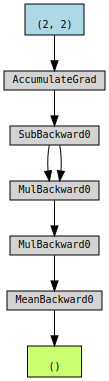

In [16]:
make_dot(a)

In [17]:
# Backprop
a.backward() # 计算梯度da/dx

In [18]:
# Compute it by hand BEFORE executing this
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


In [19]:
# 例子3
# Dynamic graphs!
x = torch.randn(3, requires_grad=True)

y = x * 2
i = 0
while y.data.norm() < 1000:
    y = y * 2
    i += 1
print(y)

tensor([ 1322.7555,  -486.4435, -1017.7455], grad_fn=<MulBackward0>)


In [20]:
# If we don't run backward on a scalar we need to specify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [21]:
# BEFORE executing this, can you tell what would you expect it to print?
print(i)

9


In [22]:
# 例子4
# 推断
# This variable decides the tensor's range below
n = 3

In [23]:
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)
z = w @ x
print(z.shape)
z.backward()
print(x.grad, w.grad, sep='\n')

torch.Size([])
tensor([1., 1., 1.])
tensor([1., 2., 3.])


In [24]:
# Only w that allows gradient accumulation
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


In [25]:
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)

# Regardless of what you do in this context, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w @ x

try:
    z.backward()  # PyTorch will throw an error here, since z has no grad accum.
except RuntimeError as e:
    print('RuntimeError!!! >:[')
    print(e)

RuntimeError!!! >:[
element 0 of tensors does not require grad and does not have a grad_fn


### 线性变换与神经网络

In [4]:
import torch
from torch import nn, optim
import random
import math
from res.plot_lib import set_default, show_scatterplot, plot_bases, plot_data, plot_model
from matplotlib.pyplot import plot, title, axis
from IPython import display

In [5]:
# Set style (needs to be in a new cell)
set_default()

In [6]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

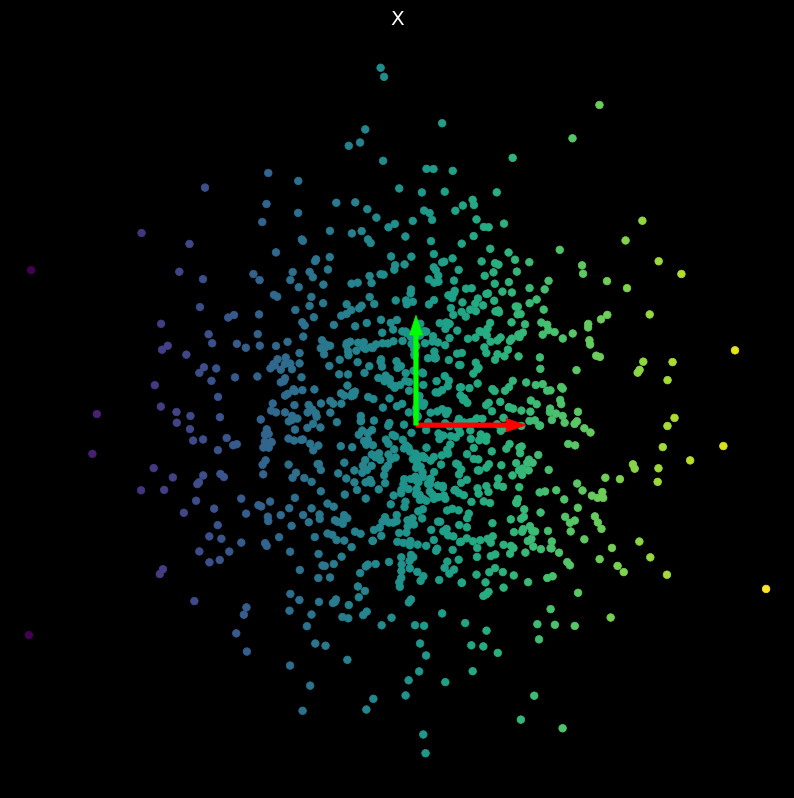

In [5]:
# 例子1: 可视化
# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

In [ ]:
# 可视化线性变换: torch.svd/奇异值
for i in range(10): # 这里只展示一个
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    # plot_bases(OI)
    plot_bases(new_OI)

In [ ]:
# 利用nn.Linear
model = nn.Sequential(
        nn.Linear(2, 2, bias=False)
)
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

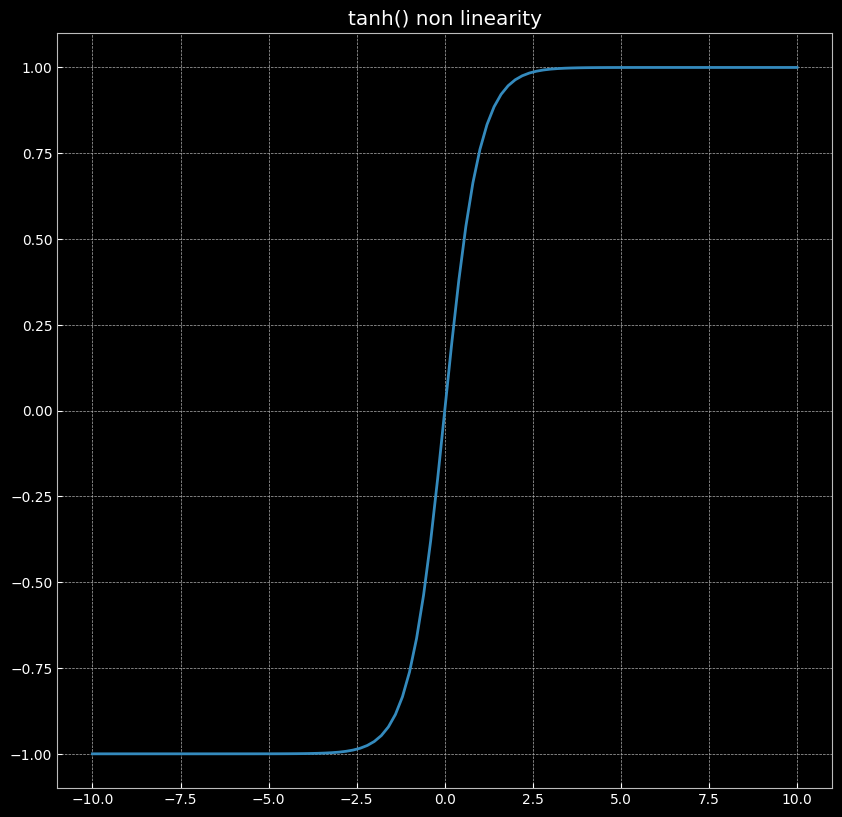

In [11]:
# 将点映射到一个square: 先使用一个因子s stretch，再使用tanh函数挤压squash
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() non linearity');

In [ ]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

In [ ]:
# 可视化由随机神经网络表示的函数
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

In [ ]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')

In [7]:
# 例子2: 标准训练过程(分类问题)
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [8]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


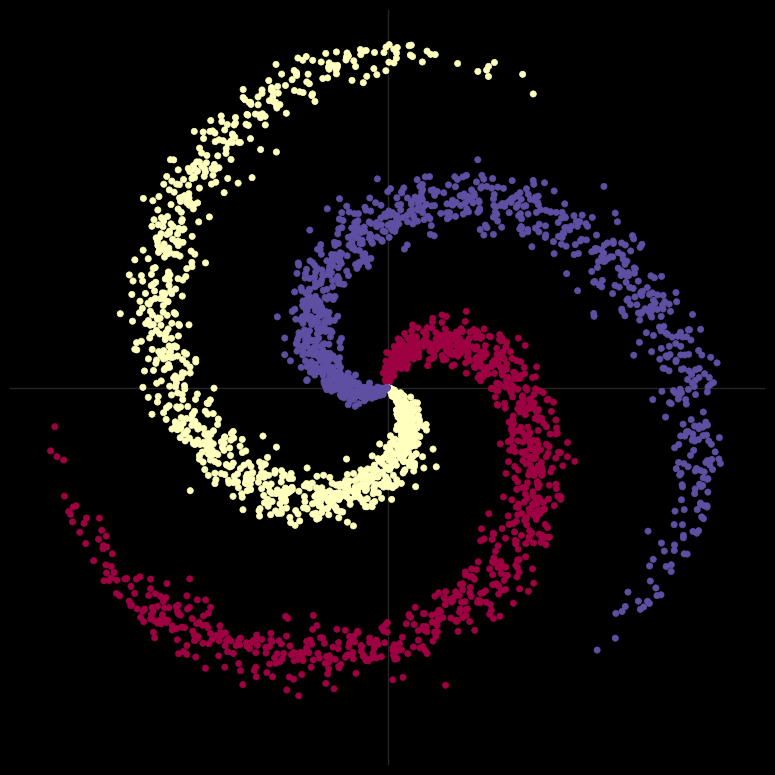

In [9]:
# visualise the data
plot_data(X, y)

In [10]:
# 线性模型
learning_rate = 1e-3
lambda_l2 = 1e-5

In [11]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device) #Convert to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()
# 参数reduction默认为mean

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2 
# optimizer = torch.optim.SGD(model.parameters(), args.lr, momentum=args.momentum, weight_decay=args.weight_decay)
# 迭代前调整修改优化器的学习率: 根绝epoch修改，for param_group in optimizer.param_groups:  param_group['lr'] = lr

In [12]:
# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.861541, [ACCURACY]: 0.504


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


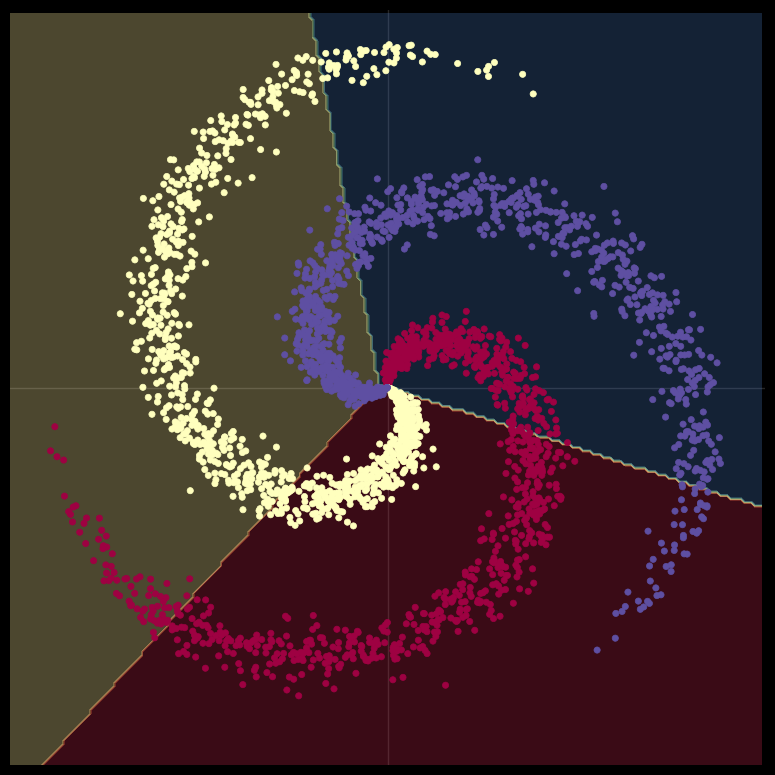

In [13]:
# Plot trained model
print(model)
plot_model(X, y, model)

In [14]:
# 两层网络
learning_rate = 1e-3
lambda_l2 = 1e-5

In [15]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

In [16]:
# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.178407, [ACCURACY]: 0.949


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


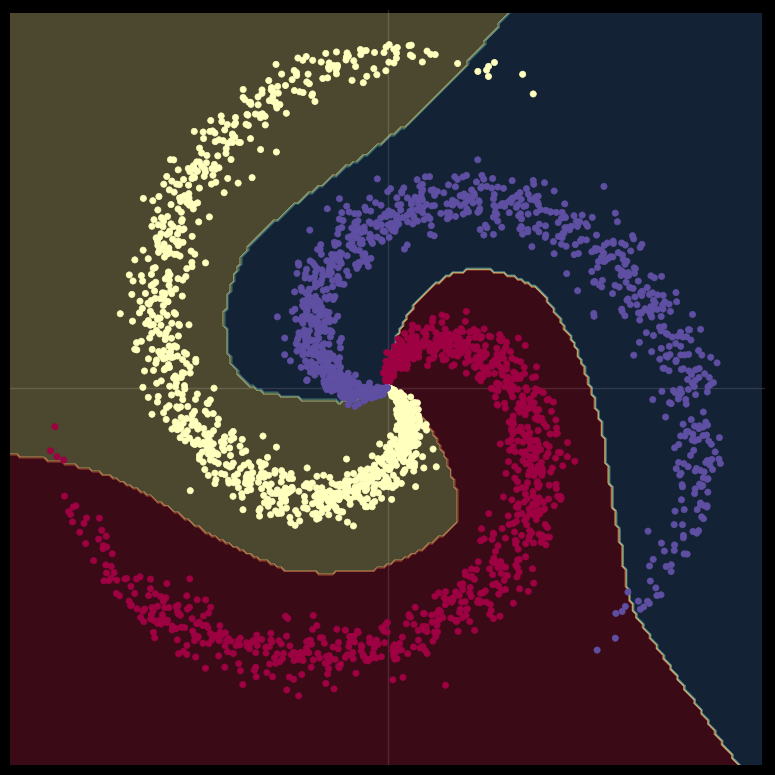

In [17]:
# Plot trained model
print(model)
plot_model(X, y, model)

## torch.nn

### 卷积

In [2]:
# torch.nn.Conv2d(channels, output, height_of_filter, width_of_filter) 输入的形状[ batch_size, channels, height_of_image, width_of_image ]
x = torch.randn(2,1,7,3)
conv = torch.nn.Conv2d(1,8,(2,3)) # height_of_filter, width_of_filter也可由一个值kernel_size给出；stride步长参数也可由一个元组或一个值给出
res = conv(x)
print(res.shape) # 输出的高和宽分别是height_of_image-height_of_filter+1, width_of_image-width_of_filter+1

torch.Size([2, 8, 6, 1])


In [5]:
input = torch.randn(20, 16, 50, 100)
m = nn.Conv2d(16, 33, 3, stride=2) # With square kernels and equal stride  
print(m(input).shape)  # 输出的高和宽需要除以stride再+1

torch.Size([20, 33, 24, 49])


In [6]:
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2)) # padding是在输入的两边添加0
print(m(input).shape)

torch.Size([20, 33, 28, 100])


In [7]:
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) # dilation指核元素之间的Spacing，默认为1，如height_of_filter=(height_of_filter-1)*dilation+1
print(m(input).shape)

torch.Size([20, 33, 26, 100])


### 池化

In [ ]:
# 提取重要信息的操作，可以去掉不重要的信息，减少计算开销
# torch.nn.MaxPool2d 参数情况可类比nn.Conv2d
# nn.AvgPool2d
# 步长的默认值是kernel_size

In [ ]:
# F.avg_pool2d() 数据是四维输入
	# input维度： （batch_size,channels,height,width）
# F.max_pool1d(inputs, kernel_size) / F.max_pool2d
# F.lp_pool2d

### RNN

In [2]:
# nn.LSTM(input_size, hidden_size, num_layers=1, bias=True, batch_first=False, dropout=0, bidirectional=False)
    # 输入为input, (h_0, c_0) 其中input形状为(seq_len, batch, input_size)；h_0, c_0形状均为(num_layers * num_directions, batch, hidden_size)
    # 输出为output, (h_n, c_n) 其中output形状为(seq_len, batch, num_directions * hidden_size)；h_n, c_n形状同上

    # 不要在太长的序列上使用RNN。因为RNN反向传播使用的是BPTT算法，其需要的内存和输入序列的长度呈线性关系
rnn = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)
output, (hn, cn) = rnn(input, (h0, c0))
print(output.shape, hn.shape, cn.shape)

torch.Size([5, 3, 20]) torch.Size([2, 3, 20]) torch.Size([2, 3, 20])


### 损失函数

In [ ]:
# nn.BCELoss

### 激活函数

In [1]:
# nn.Softmax
# nn.LogSoftmax: 对softmax的结果进行log，即Log(Softmax(x))
# nn.ReLU() / nn.ReLU(inplace=True)
# nn.Sigmoid()
# nn.Tanh()
# nn.LeakyReLU(0.1)
# nn.GELU()

### 变换

In [ ]:
# nn.Embedding
	# nn.Embedding(vocabulary_size, embedding_dimension).from_pretrained(args.vectors, freeze=not args.non_static)
	# 默认freeze=True;  If True, the tensor does not get updated in the learning process. Equivalent to embedding.weight.requires_grad = False
	# embeddings.weight.data.copy_(TEXT_field.vocab.vectors)/embedding.weight.data[i] = word_vectors[token]
# nn.Linear
	# .weight.data.shape
	# 不要使用太大的线性层。因为nn.Linear(m,n)使用的是的O(mn)的内存，线性层太大很容易超出现有显存
# self.register_buffer()

### 初始化

In [ ]:
# nn.init.normal_()
# nn.init.xavier_normal_()
# nn.init.kaiming_uniform_()
# torch.nn.init.uniform_
# torch.nn.init.constant_

### 网络相关

In [ ]:
# nn.Module
# nn.ModuleList()
# nn.Sequential() / .add_module()
	# nn.Sequential(*layers) / layers=[]
# nn.Parameter
	# nn.Parameter(tensor, requires_grad)

### nn.functional as F

In [ ]:
# F.sigmoid

### 其他

In [ ]:
# torch.nn.BatchNorm2d(num_features） 默认是有可学习的参数，若affine=False则无
# nn.BatchNorm1d

In [ ]:
# nn.Dropout

In [ ]:
# nn.utils.clip_grad_norm_(model.parameters(), max_norm=20) # 梯度裁剪（gradient clipping）
# nn.utils.rnn.pack_padded_sequence
# nn.utils.rnn.pad_packed_sequence

In [ ]:
# 定义可训练的参数
# nn.Parameter(torch.zeros(in_dim,hid))
	# 与torch.tensor(list,requires_grad=True)的区别，这个只是将参数变成可训练的，并没有绑定在module的parameter列表中。

## torch.utils

In [ ]:
# torch.utils.data
	# data.DataLoader(dataset, 4) # 第一个参数类型为torch.utils.data.Dataset，第二个参数为batch_size
	# 还有参数num_workers, shuffle, pin_memory
		# batch_sampler, collate_fn, sampler(当该参数为空时，一般pin_memory=False)
	# torch.utils.data.DataLoader 中尽量设置 pin_memory=True
	# 对特别小的数据集如 MNIST 设置 pin_memory=False 反而更快一些
	# num_workers 的设置需要在实验中找到最快的取值

	# from torch.utils.data import Subset
		# train_set = Subset(train_set, train_idx_normal=[])

	# torch.utils.data.sampler.Sampler
	# 一个 迭代器 基类
	def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
	# SequentialSampler: 按顺序对数据集采样
		# 在__iter__方法中首先得到一个和data_source一样长度的range可迭代器。每次只会返回一个索引值。
		# 即iter(range(len(self.data_source)))
	# RandomSampler: 
		# num_samples: 指定采样的数量，默认是所有
		# replacement: 若为True，则表示可以重复采样，即同一个样本可以重复采样，这样可能导致有的样本采样不到。所以此时我们可以设置num_samples来增加采样数量使得每个样本都可能被采样到。
		# __iter__方法
		n = len(self.data_source)
        if self.replacement:
            return iter(torch.randint(high=n, size=(self.num_samples,), dtype=torch.int64).tolist())
        return iter(torch.randperm(n).tolist())
	# SubsetRandomSampler: 这个采样器常见的使用场景是将训练集划分成训练集和验证集 init函数中给定indices
		# iter函数返回(self.indices[i] for i in torch.randperm(len(self.indices)))
	# WeightedRandomSampler: init函数中多了参数weights
		# self.weights = torch.tensor(weights, dtype=torch.double) 或 self.weights = torch.DoubleTensor(weights)
		# iter函数返回iter(torch.multinomial(self.weights, self.num_samples, self.replacement=True).tolist())


	# train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
	# train_sampler.set_epoch(epoch)

In [ ]:
# torch.randint(low=0, high, size) 可重复
# torch.rand(): 均匀分布
# torch.randn(): 标准正态分布

# torch.randperm(n) # 返回一个0~n-1的数组，随机打散的 不重复

## torchnlp

In [ ]:
from torchnlp.samplers import BucketBatchSampler
BucketBatchSampler(dataset, batch_size, drop_last=True, sort_key)

In [ ]:
from torchnlp.encoders.text.text_encoder import stack_and_pad_tensors

In [ ]:
from torchnlp.datasets.dataset import Dataset
Dataset(examples=[{},...,{}])
train_set.columns.add('index')

In [ ]:
from torchnlp.utils import datasets_iterator
text_corpus = [row['text'] for row in datasets_iterator(train_set, test_set)]

# from torchnlp.encoders.text import SpacyEncoder
    # SpacyEncoder(text_corpus, min_occurrences)
    # encoder.encode(text) # 索引化
    # encoder.vocab_size

In [ ]:
from torchnlp.encoders.text.default_reserved_tokens import DEFAULT_EOS_INDEX, DEFAULT_UNKNOWN_INDEX
from torchnlp.encoders.text.default_reserved_tokens import DEFAULT_SOS_TOKEN

In [ ]:
from torchnlp.word_to_vector import GloVe, FastText
word_vectors = GloVe(name='6B', dim=embedding_size, cache=word_vectors_cache) # 'GloVe_6B', 'GloVe_42B', 'GloVe_840B', 'GloVe_twitter.27B'
word_vectors = FastText(language='en', cache=word_vectors_cache) # 会出现问题: urllib.error.HTTPError: HTTP Error 403: Forbidden
	# from torchtext.vocab import FastText
	# 改成上面下载不会出现上述问题, 但可能下载较慢或出现其他意外的问题, 多试几次就可以
	# 也有torchtext.vocab.GloVe

## Pipeline

### input

In [2]:
import torchvision
import torchvision.transforms as transforms
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)
# 也可使用自定义数据集
# custom_dataset = CustomDataset() # CustomDataset(torch.utils.data.Dataset)，需定义好__init__(self)、__getitem__(self, index)和__len__(self)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


### 预训练模型

In [3]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/yaoqf/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



torch.Size([64, 100])


### 存储和下载模型

In [4]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')
# torch.load(resume, map_location=torch.device(f'cuda:{str(args.gpu)}'))
	# map_location指明此时的device环境
# model.load_state_dict(checkpoint['state_dict']) 
	# 函数load_state_dict有参数strict 默认strict=True; 判断参数拷贝过程中是否有unexpected_keys或者missing_keys,如果有就报错，代码不能继续执行。当然，如果strict=False，则会忽略这些细节。
	# model.state_dict()其实返回的是一个OrderDict，存储了网络结构的名字和对应的参数
# optimizer.load_state_dict(checkpoint['optimizer'])
# 可保存自定义字典，文件名如ckpt.pth.tar

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>

In [ ]:
# 部分层使用预训练模型
# 注意如果保存的模型是 torch.nn.DataParallel，则当前的模型也需要是
# model.load_state_dict(torch.load('model.pth'), strict=False)
# 将在 GPU 保存的模型加载到 CPU
# model.load_state_dict(torch.load('model.pth', map_location='cpu'))

In [ ]:
# model = torch.nn.DataParallel(model).cuda()
# torch.nn.DataParallel(model, device_ids=[0,1,2])

In [ ]:
# 保存与加载断点
# 注意为了能够恢复训练，我们需要同时保存模型和优化器的状态，以及当前的训练轮数
# start_epoch = 0
# # Load checkpoint.
# if resume: # resume为参数，第一次训练时设为0，中断再训练时设为1
#     model_path = os.path.join('model', 'best_checkpoint.pth.tar')
#     assert os.path.isfile(model_path)
#     checkpoint = torch.load(model_path)
#     best_acc = checkpoint['best_acc']
#     start_epoch = checkpoint['epoch']
#     model.load_state_dict(checkpoint['model'])
#     optimizer.load_state_dict(checkpoint['optimizer'])
#     print('Load checkpoint at epoch {}.'.format(start_epoch))
#     print('Best accuracy so far {}.'.format(best_acc))

# # Train the model
# for epoch in range(start_epoch, num_epochs): 
#     ... 

#     # Test the model
#     ...

#     # save checkpoint
#     is_best = current_acc > best_acc
#     best_acc = max(current_acc, best_acc)
#     checkpoint = {
#         'best_acc': best_acc,
#         'epoch': epoch + 1,
#         'model': model.state_dict(),
#         'optimizer': optimizer.state_dict(),
#     }
#     model_path = os.path.join('model', 'checkpoint.pth.tar')
#     best_model_path = os.path.join('model', 'best_checkpoint.pth.tar')
#     torch.save(checkpoint, model_path)
#     if is_best:
#         shutil.copy(model_path, best_model_path)

In [ ]:
# torch.distributions.uniform.Uniform

# torch.distributions
	# d = torch.distributions.normal.Normal(loc=mu, scale=sigma)
		# d.sample(sample_shape=shape) 
		# d.log_prob(x) 得确保torch.isnan(logp).sum() == 0
		# d.icdf(x) 得确保((x < 0) | (x > 1)).sum() == 0
		# d.cdf(x)
	# torch.distributions.uniform.Uniform(low=0.0, high=1.0)

In [ ]:
# 计算数据集的均值和标准差
def compute_mean_and_std(dataset):
    # 输入PyTorch的dataset，输出均值和标准差
    mean_r = 0
    mean_g = 0
    mean_b = 0

    for img, _ in dataset:
        img = np.asarray(img) # change PIL Image to numpy array
        mean_b += np.mean(img[:, :, 0])
        mean_g += np.mean(img[:, :, 1])
        mean_r += np.mean(img[:, :, 2])

    mean_b /= len(dataset)
    mean_g /= len(dataset)
    mean_r /= len(dataset)

    diff_r = 0
    diff_g = 0
    diff_b = 0

    N = 0

    for img, _ in dataset:
        img = np.asarray(img)

        diff_b += np.sum(np.power(img[:, :, 0] - mean_b, 2))
        diff_g += np.sum(np.power(img[:, :, 1] - mean_g, 2))
        diff_r += np.sum(np.power(img[:, :, 2] - mean_r, 2))

        N += np.prod(img[:, :, 0].shape)

    std_b = np.sqrt(diff_b / N)
    std_g = np.sqrt(diff_g / N)
    std_r = np.sqrt(diff_r / N)

    mean = (mean_b.item() / 255.0, mean_g.item() / 255.0, mean_r.item() / 255.0)
    std = (std_b.item() / 255.0, std_g.item() / 255.0, std_r.item() / 255.0)
    return mean, std

In [ ]:
torch.multinomial(weights, num_samples, replacement=True) # weights给出每个样本的权重 按权重向量进行采样, 输出对应的索引

In [ ]:
torch.exp

In [ ]:
torch.topk(input, k, dim=None, largest=True, sorted=True, out=None)
# 其中k是保留的k个值，largest=True意味着选取最大的，sorted=True是指将返回结果排序
# topk返回的是一个tuple，第一个元素指返回的具体值，第二个元素指返回值的index

In [ ]:
F.pad(input, pad, mode='constant', value=0) # 便于对数据集图像或中间层特征进行维度扩充
	# pad: 扩充维度，用于预先定义出某维度上的扩充参数
		# p1d = (1, 2)即(左边填充数, 右边填充数)，针对最后一维
		# p2d = (1, 2, 3, 4)即(左边填充数， 右边填充数， 上边填充数， 下边填充数)，针对最后两维
	# mode: 扩充方法，’constant‘, ‘reflect’ or ‘replicate’三种模式，分别表示常量，反射，复制
	# value: 扩充时指定补充值，但是value只在mode='constant’有效，即使用value填充在扩充出的新维度位置，而在’reflect’和’replicate’模式下，value不可赋值

In [ ]:
F.normalize(tensor, dim)

In [ ]:
torch.renorm(x, p=2, dim=0, maxnorm=1e2)

In [ ]:
# torch.rot90(input, k, dim): # 矩阵逆时针旋转k个90度，当k为负数时为顺时针旋转

In [ ]:
torch.isnan
# X_batch[torch.isnan(X_batch)] = 0

In [ ]:
tensor.exp().sum().log()

In [ ]:
.weight.data.abs()

In [ ]:
torch.autograd.Variable

torch.initial_seed()

In [ ]:
torch.full((3,3),10, dtype, requires_grad) # 填充

In [ ]:
nn.LayerNorm(2,elementwise_affine=True)

In [ ]:
encoder_layer = nn.TransformerEncoderLayer(embsize, att_heads=10, dim_feedforward=att_ff_dim=300, dropout=0)
contextualizer = nn.TransformerEncoder(encoder_layer, att_layer=2, norm=None)

In [ ]:
.fill_(1).cumsum(0)

In [ ]:
torch.sin/torch.cos

In [ ]:
torch.cuda.device_count()
torch.cuda.get_device_name()

In [ ]:
torch.nn.BCEWithLogitsLoss()

In [ ]:
scaler = torch.cuda.amp.GradScaler()

In [ ]:
import torch.multiprocessing as mp
mp.set_sharing_strategy("file_system") # VERY MUCH needed for linux !! makes everything faster, but tends to break stuff

mp.get_all_start_methods()

In [ ]:
torch.save(checkpoint=dict, 'checkpoints/code_{}_map_{:.4f}.pt'.format(code_length, mAP))

In [ ]:
torch.argsort

In [ ]:
# num_query<=(num_bit, 1)-->(num_bit, num_query)

In [ ]:
# Tensor中只有一个数字时，使用torch.Tensor.item()可以得到一个Python数字

# tensor.requires_grad 默认为False 因此.grad没有输出
# 一般.dtype输出torch.float32
# requires_grad为True时，表示需要计算Tensor的梯度。requires_grad=False可以用来冻结部分网络，只更新另一部分网络的参数

# .data返回的是一个新的Tensor对象，因此它们的id不同，说明二者不是同一个Tensor
# 但它们共享数据的存储空间，即二者的数据部分指向同一块内存，因此修改b的元素时，a的元素也对应修改

# 执行tensor.requires_grad_(), 可输出tensor可得到tensor([1., 2.], requires_grad=True)
	# requires_grad_()函数会改变Tensor的requires_grad属性并返回Tensor，修改requires_grad的操作是原位操作(in place)
	# 其默认参数为requires_grad=True。requires_grad=True时，自动求导会记录对Tensor的操作，requires_grad_()的主要用途是告诉自动求导开始记录对Tensor的操作
# 对上述tensor进行运算并执行.backward() 上述tensor的.grad有输出

# detach()函数会返回一个新的Tensor对象b，并且新Tensor是与当前的计算图分离的
# 其requires_grad属性为False，反向传播时不会计算其梯度。b与a共享数据的存储空间，二者指向同一块内存
# 共享内存空间只是共享的数据部分，a.grad与b.grad是不同的。

# torch.no_grad()是一个上下文管理器，用来禁止梯度的计算，通常用来网络推断中，它可以减少计算内存的使用量

# .retain_grad()
# 对非叶节点张量(即中间节点张量)启用用于保存梯度的属性(.grad)
# 默认情况下, 对于非叶节点张量是禁用属性.grad, 计算完梯度之后就被释放回收内存, 不会保存中间结果的梯度

In [ ]:
torch.multiprocessing.spawn 分布式训练
import torch.multiprocessing as mp
mp.spawn(main_worker, nprocs=ngpus_per_node, args=(ngpus_per_node, args))

import torch.distributed as dist
dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,
                                world_size=args.world_size, rank=args.rank)
# dist-backend: default='nccl'; dist-url: default='tcp://localhost:10001'

torch.nn.parallel.DistributedDataParallel(model, device_ids=[])

In [ ]:
# .reciprocal() 倒数